<a href="https://colab.research.google.com/github/subham129/Machine-Learning-/blob/main/Time_Series2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [ ]:
df = yf.download('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<Axes: xlabel='Date'>

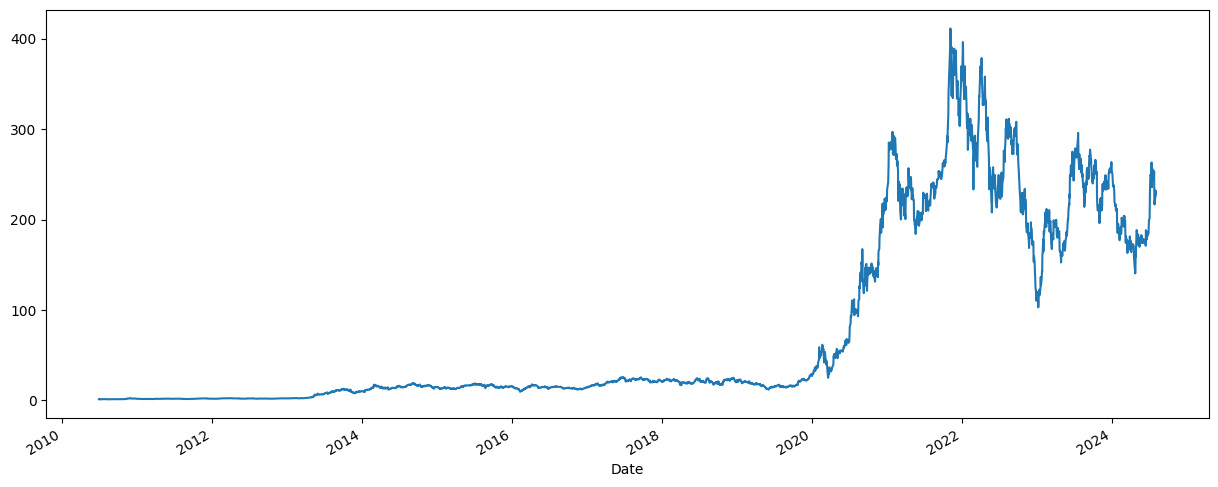

In [ ]:
df['Open'].plot(figsize=(15,6))

In [ ]:
df['Open:10 DAYS rolling'] = df['Open'].rolling(window=10,min_periods=1).mean()
df['Open:20 DAYS rolling'] = df['Open'].rolling(window=20,min_periods=1).mean()
df['Open:30 DAYS rolling'] = df['Open'].rolling(window=30,min_periods=1).mean()

<Axes: xlabel='Date'>

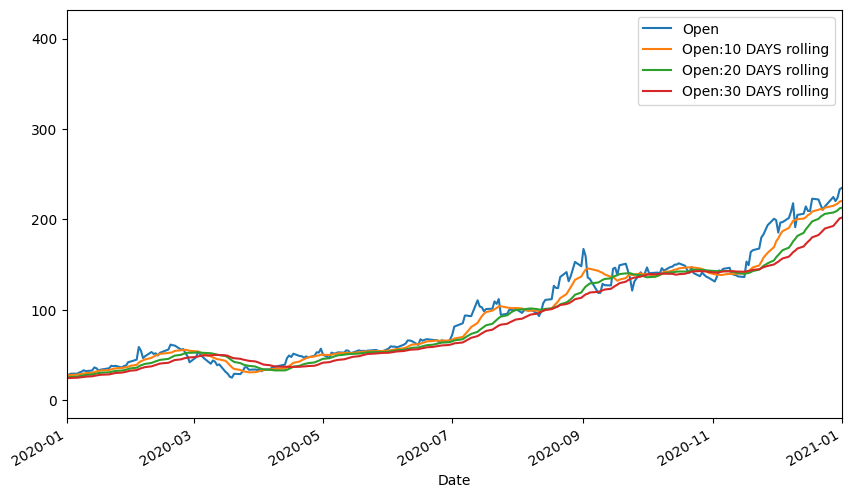

In [ ]:
#sma
df[['Open','Open:10 DAYS rolling','Open:20 DAYS rolling','Open:30 DAYS rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(10,6))

<Axes: xlabel='Date'>

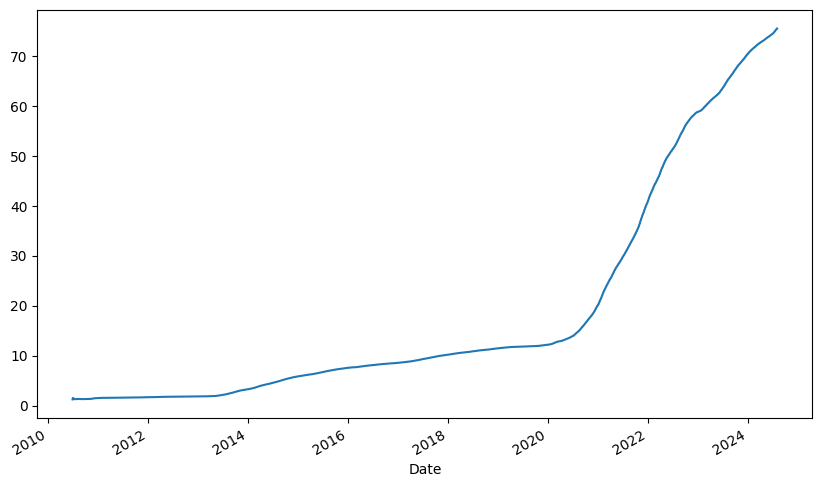

In [ ]:
#cma
df['Open'].expanding().mean().plot(figsize=(10,6))

In [ ]:
#Ema formula == ((close-prev EMA)* multiplier)+ prev EMA   multiplier formula ==  (2/(10+1))  10=rolling

df['EMA_0.1'] = df['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

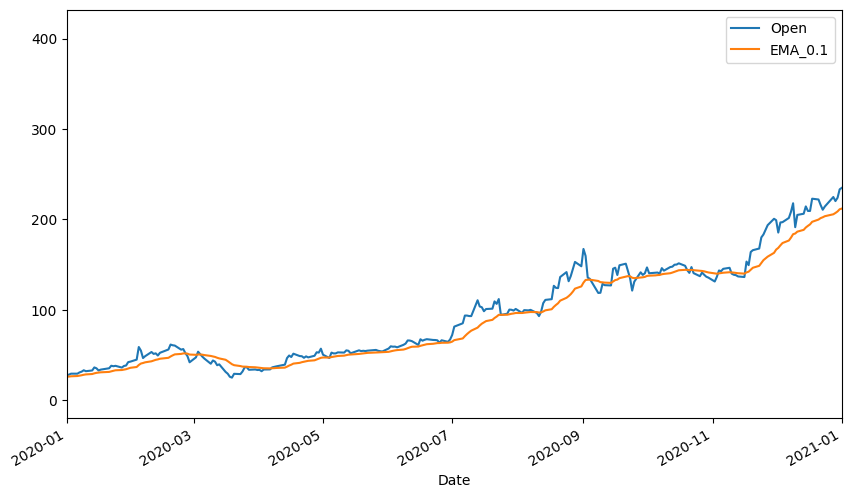

In [ ]:
df[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(10,6))

In [ ]:
#ewma
df['EMA_5days'] = df['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

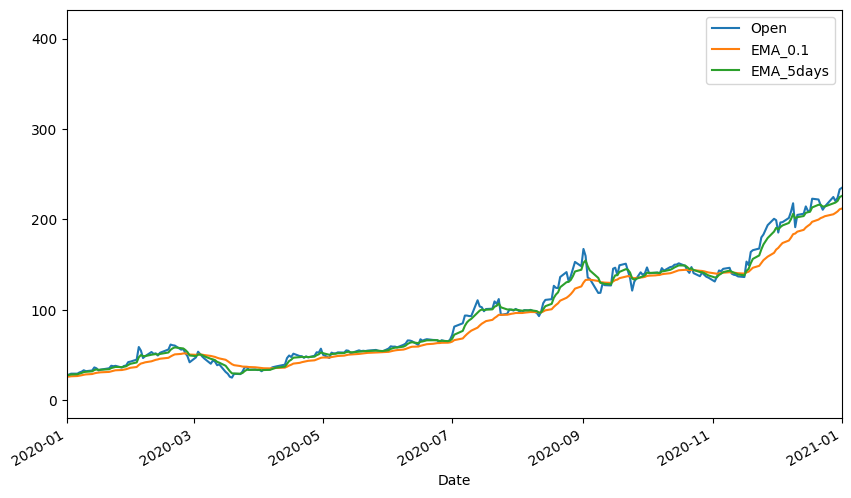

In [ ]:
df[['Open','EMA_0.1 ','EMA_5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(10,6))